# Risk analysis of luxury groups in 2020 #

***
Based on creativity, know-how, and cultures, the core element of the luxury industry is human interaction. In a few years, first with **Facebook**, and then with the king of lifestyle **Instagram**, the Facebook ecosystem has created the perfect social platforms for brands, art directors, creatives, and storytellers to connect directly with an audience.

The **COVID-19 pandemic** is having an enormous impact on this industry. In Europe and the USA, travel restrictions revealed that fashion buyers of department’s stores are disconnected from local clients and focused almost entirely on leveraging the flows of incoming tourists. When the biggest brands have brilliant e-Commerce solution, most of brands have poor consumer experience in their digital ecosystem. The third-party marketplaces might be a great alternative but are not the solution long term.

This preliminary research notebook will have three main points:

- **Understand the financial impact of Covid-19 on stocks in 2020**
- **Quantify the importance of Facebook in the luxury industry**
- **Assess potential risks for investors and various stakeholders**


In [1]:
#Libraries
import os
from datetime import datetime
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import seaborn as sns

## - Import stocks into a DataFrame via Yahoo API -

In order to have a global view of the luxury industry, I have selected a basket of securities starting from the biggest MarktCap luxury giant, **MC.PA** *(LVMH Group - Louis Vuitton, Dior, Fendi)*, **RMS.PA** *(Hermes International)*, **EL** *(Estée Lauder Companies Inc, - Clinique, Mac Cosmetics)*, **KER.PA** *(Kering SA - Gucci, Saint Laurent, Alexander McQueen)*, **CFR.SW** *(Compagnie Financière Richemont SA - Cartier, Van Cleef & Arpels, Piaget)*, **MONC.MI** *(Moncler)*, **BRBY.L** *(Burberry)*, **TPR** *(Tapestry, Inc - Coach, Kate Spade)*, **RL** *(Ralph Lauren Inc)* to one of the smallest MarketCap the Italian fashion brand, **SFER.MI** *(Salvatore Ferragamo)*.

We will import **FB** *(Facebook Inc)* right in the middle as a comparative stock. : )

In [2]:
tickers = ['MC.PA','RMS.PA','EL','KER.PA','CFR.SW','FB','MONC.MI','BRBY.L','TPR','RL','SFER.MI'] #List of Tickers

sec_data = pd.DataFrame() #Create DataFrame
for t in tickers:
    sec_data[t] = wb.DataReader(t, data_source='yahoo',start='2020-01-01',end='2020-12-31')['Adj Close'] #Loop to request prices

## - Missing Prices on the DataFrame -

In [3]:
sec_data.head(2) #Display first rows of dataframe

,MC.PA,RMS.PA,EL,KER.PA,CFR.SW,FB,MONC.MI,BRBY.L,TPR,RL,SFER.MI
Date,,,,,,,,,,,
2020-01-02,409.435028,666.436462,204.839874,576.156982,NaN,209.779999,39.870552,2201.0,26.555882,117.632385,18.955
2020-01-03,409.386200,670.806519,203.290619,578.951050,75.43084,208.669998,39.379414,2224.0,26.546019,117.008530,18.605


Stocks of luxury groups are traded in various parts of the world. Due to Berchtold Day in Switzerland, on January 2nd 2020, we discovered that the adjusted closing prices of the **CFR.SW (Richemont)** is missing prices (NaN values). The first conundrum comes from the fact that securities are not traded in the same timeframe due to the difference of calendars on the stock exchanges. 

In [4]:
sec_data.tail(5) #Display last rows of dataframe

,MC.PA,RMS.PA,EL,KER.PA,CFR.SW,FB,MONC.MI,BRBY.L,TPR,RL,SFER.MI
Date,,,,,,,,,,,
2020-12-24,496.450012,851.400024,260.950012,550.256592,NaN,267.399994,NaN,1760.0,30.850000,100.919998,NaN
2020-12-28,504.000000,869.200012,263.820007,568.873962,80.199997,277.000000,49.730000,NaN,30.860001,103.440002,15.38
2020-12-29,512.799988,882.599976,262.750000,574.946960,80.500000,276.779999,50.299999,1813.5,30.110001,101.559998,15.91
2020-12-30,513.099976,884.000000,262.619995,585.400513,80.080002,271.869995,50.139999,1811.5,31.450001,103.940002,15.86
2020-12-31,510.899994,879.599976,266.190002,591.772278,NaN,273.160004,NaN,1789.5,31.080000,103.739998,NaN


Similarly, **EL (Estée Lauder)** and **TRP (Tapestry)** are not trading on President day (or MLK day) in the USA or **MONC.MI (Moncler)** and **SFER.MI (Salvatore Ferragamo)** for Christmas day and NYE in Italy. 

***
## -  Stocks are taking holidays, not social media! -
***

If the stock market periodically closes on weekends, during the public and bank holidays. And if we are comparing securities accross various stock exchanges in different countries. We will obviously have missing days, so missing prices. Therefore, we have three options:
 1. **Interpolate between prices and create "fake" prices**
 2. **Remplace missing prices by 0.00000**
 3. **Delete all the prices if one security is missing**
 
We will choose the **third option** by sacrificing valid prices in order to have a full and coherent calendar. In Python, first solution is to interpolate stock prices with the method "time", the second solution is to let NumPy handle the NaN values, and the third solution is the dropna function.

## - Compare LVMH, Kering, and Hermès via Normalization -

First, we can focus on the mouvements with a normalization at base value of 100 for every securities in the Paris stock exchange.

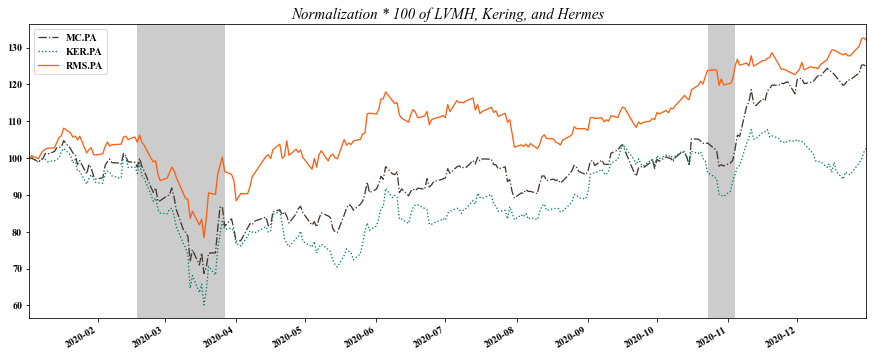

In [5]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = '10'

(sec_data['MC.PA'] / sec_data['MC.PA'].iloc[0] * 100).plot(figsize = (15,6),color='#453630',linestyle='-.',linewidth = 1.3)
(sec_data['KER.PA'] / sec_data['KER.PA'].iloc[0] * 100).plot(figsize = (15,6),color='#017A63',linestyle=':',linewidth = 1.3)
(sec_data['RMS.PA'] / sec_data['RMS.PA'].iloc[0] * 100).plot(figsize = (15,6),color='#FD5E0F',linewidth = 1.3)

plt.axvspan(datetime(2020,2,18),datetime(2020,3,27), facecolor='0.5', alpha=0.4) #Shading Lockdown
plt.axvspan(datetime(2020,10,23),datetime(2020,11,4), facecolor='0.5', alpha=0.4) #Shading Lockdown

plt.title("Normalization * 100 of LVMH, Kering, and Hermes",fontsize=15,
          family='Times New Roman', style='italic')
plt.xlabel("")
plt.legend()
plt.show() 

We can clearly see the fall of **MC.PA (LVMH)**, **KER.PA (Kering)**, and **RMS.PA (Hermes)** in the February/March 2020 due the spreading of the pandemic. 

## - Compare Moncler & Salvatore Ferragamo via normalized price indicator -

On the Milan stock exchange, we can also see a similar pattern with a huge drop in the beginning of the year with a slow recovery at the end.

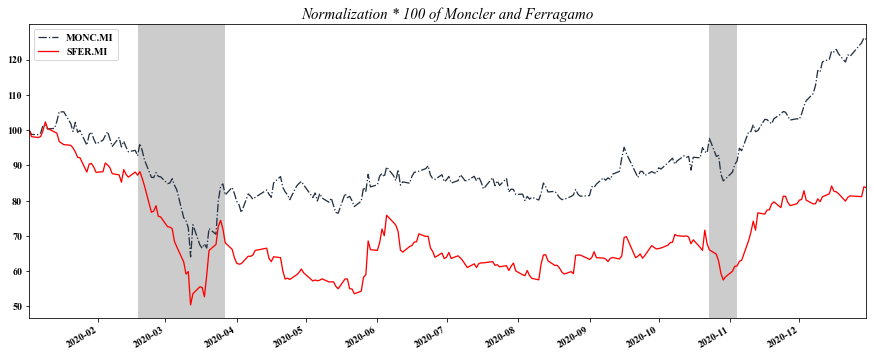

In [6]:
s_data = sec_data[['SFER.MI','MONC.MI']].dropna() #DropNa to handle NaN values

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = '10'

(s_data['MONC.MI'] / s_data['MONC.MI'].iloc[0] * 100).plot(figsize = (15,6),color='#243242',linestyle='-.',linewidth = 1.3)
(s_data['SFER.MI'] / s_data['SFER.MI'].iloc[0] * 100).plot(figsize = (15,6),color='#ff0000',linewidth = 1.3)

plt.axvspan(datetime(2020,2,18),datetime(2020,3,27), facecolor='0.5', alpha=0.4) #ShadingLockdown
plt.axvspan(datetime(2020,10,23),datetime(2020,11,4), facecolor='0.5', alpha=0.4) #ShadingLockdown

plt.title("Normalization * 100 of Moncler and Ferragamo",fontsize=15,
          family='Times New Roman', style='italic')
plt.xlabel("") #NoXLabel
plt.legend()
plt.show()

## - Simple or  Log Returns? -

We can measure the **profitability** of an asset by calculating either simple returns or logarithmic returns. By using the return, we can then compare the evolution of various securities. In layman's terms, the daily return is equal to the Price of stock at Time 0 (Today) - the Price of Stock at Time 1 (Yesterday) divided by the Price of Stock at Time (Yesterday) minus 1. 

If $P_t$ is the price of the security at time $t$ then:

   **Simple returns**<br> $$ Rt=\frac{P_t}{P_t-1}-1 $$
   
Neverthless, the **Logarithmic returns** might be more adapted to compound the annual log returns and easier to compute in Python. 

   **Logarithmic returns**<br> $$ rt=\ln\left(\frac{P_t}{P_t-1}\right) $$

In [7]:
log_returns = np.log(1 + sec_data.pct_change()).dropna() #Log handle by NumPy then % change function

In [8]:
log_returns[['MC.PA','KER.PA','RMS.PA']].mean() #Call the mean of the returns

MC.PA     0.000876
KER.PA    0.000087
RMS.PA    0.001071
dtype: float64

Unfortunately, the daily rate of returns doesn't give a lot of perspective. It might be more interesting to compute the **annualized rate of returns** by multipling not by 356 days, but by the number of trading days, **250 days**. For 2020, the rate of return of **MC.PA (LVMH Group)** is at 21.88%, **KER.PA (Kering Group)** is at 2.16% and **RMS.PA (Hermes International)** at 26.77%. 

In [9]:
MC = log_returns['MC.PA'].mean() * 250 #Annualized Log Returns
print(str(round(MC,5)* 100) + ' %') #Much friendlier display of the rate of return
KER = log_returns['KER.PA'].mean() * 250
print(str(round(KER,5)* 100) + ' %')
RMS = log_returns['RMS.PA'].mean() * 250
print(str(round(RMS,5)* 100) + ' %')

21.889 %
2.164 %
26.777 %


## - Comparative log returns of LVMH, Kering, and Hermès -

In the chart below, we can compare the daily returns for **MC.PA (LVMH Group)** in brown, **KER.PA (Kering Group)** in green and **RMS.PA (Hermes Intl)** in orange.

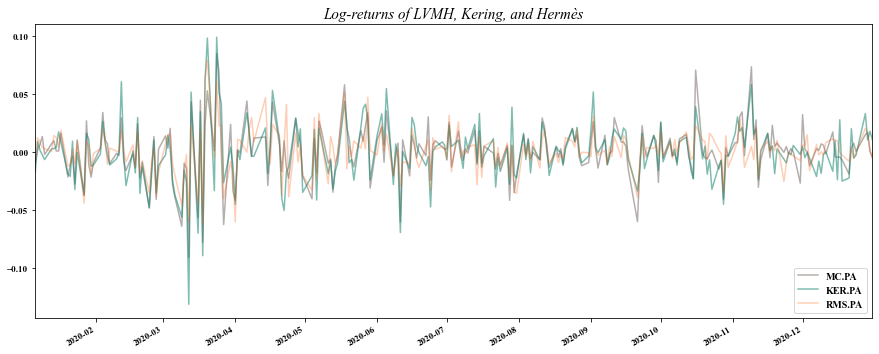

In [28]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = '9'

log_returns['MC.PA'].plot(figsize=(15,6),alpha=0.4,color='#453630')
log_returns['KER.PA'].plot(figsize=(15,6),alpha=0.5,color='#017A63')
log_returns['RMS.PA'].plot(figsize=(15,6),alpha=0.3,color='#FD5E0F')

plt.title("Log-returns of LVMH, Kering, and Hermès",fontsize=15,
          family='Times New Roman', style='italic') 
plt.legend(loc=4, prop={'size': 10})
plt.xlabel('')
plt.show()

The average rate of return for **KER.PA (Kering Group)** is clearly showing some huge movements on both the positive and negative during the beginning of the pandemic. 

## - Standard Deviation -

When the returns will give us the excepted **profitability** of one security. The standard deviation will give us an estimation of the **volatility** of the excepted return. Assuming that the distribution is normal distribution (or bell-shaped curve) then the standard deviation equation will be:

$$ s = \sqrt{\frac{1}{N-1} \sum_{i=1}^N (x_i - \bar{x})^2} $$


In [11]:
#log_returns[['MC.PA','KER.PA','RMS.PA']].std() #Daily Standard Deviation
log_returns[['MC.PA','KER.PA','RMS.PA']].std() * 250 ** 0.5 #Annualized Standard Deviation

MC.PA     0.363516
KER.PA    0.408449
RMS.PA    0.298381
dtype: float64

***
## - Log Return for 2020 -

***
### - LVMH Moet Hennessy Louis Vuitton SE -

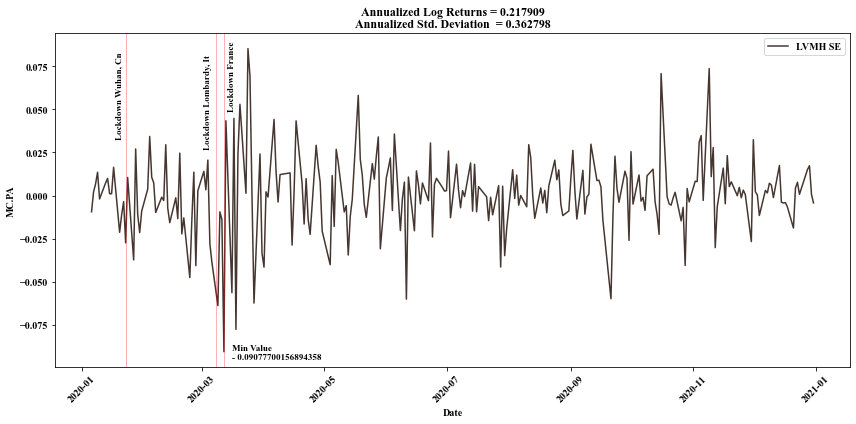

In [30]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = '10'

fig = plt.figure(figsize=(12,6)) 
log_returnsMCPA = log_returns['MC.PA']

sns.lineplot(data=log_returnsMCPA,color='#453630')

plt.axvline(datetime(2020, 1, 23), color='r', linewidth=1,alpha=0.3)
plt.text(datetime(2020, 1, 18), 0.034, 'Lockdown Wuhan, Cn', fontsize=9,rotation=90)

plt.axvline(datetime(2020, 3, 8), color='r', linewidth=1,alpha=0.3)
plt.text(datetime(2020, 3, 2), 0.028, 'Lockdown Lombardy, It', fontsize=9,rotation=90)

plt.axvline(datetime(2020, 3, 12), color='r', linewidth=1,alpha=0.3)
plt.text(datetime(2020, 3, 14), 0.050, 'Lockdown France', fontsize=9,rotation=90)

MCPAmin = log_returns['MC.PA'].min()
plt.text(datetime(2020, 3, 16), -0.095, 'Min Value\n- 0.09077700156894358', fontsize=9)

plt.xticks(rotation=45)
plt.title("Annualized Log Returns = 0.217909\nAnnualized Std. Deviation  = 0.362798", fontsize=12)
plt.legend(loc='upper right', labels=['LVMH SE'])
plt.tight_layout()
plt.show()

### - Kering SA -

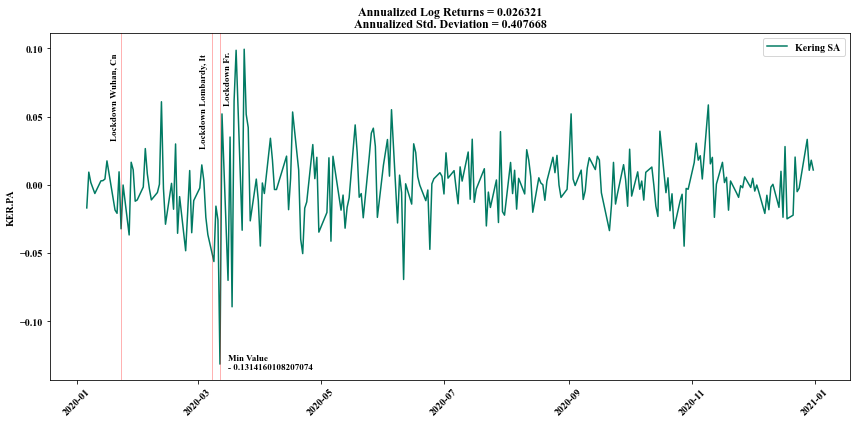

In [13]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = '10'

fig = plt.figure(figsize=(12,6)) 
log_returnsKERPA = log_returns['KER.PA']

sns.lineplot(data=log_returnsKERPA,color='#017A63')

plt.axvline(datetime(2020, 1, 23), color='r', linewidth=1,alpha=0.3)
plt.text(datetime(2020, 1, 18), 0.034, 'Lockdown Wuhan, Cn', fontsize=9,rotation=90)

plt.axvline(datetime(2020, 3, 8), color='r', linewidth=1,alpha=0.3)
plt.text(datetime(2020, 3, 2), 0.028, 'Lockdown Lombardy, It', fontsize=9,rotation=90)

plt.axvline(datetime(2020, 3, 12), color='r', linewidth=1,alpha=0.3)
plt.text(datetime(2020, 3, 14), 0.060, 'Lockdown Fr.', fontsize=9,rotation=90)

KERPAmin = log_returns['KER.PA'].min()
plt.text(datetime(2020, 3, 16), -0.135, 'Min Value\n- 0.1314160108207074', fontsize=9)

plt.xticks(rotation=45)
plt.title("Annualized Log Returns = 0.026321\nAnnualized Std. Deviation = 0.407668", fontsize=12)
plt.xlabel("")
plt.legend(loc='upper right', labels=['Kering SA'])
plt.tight_layout()
plt.show()

### - Hermès International  -

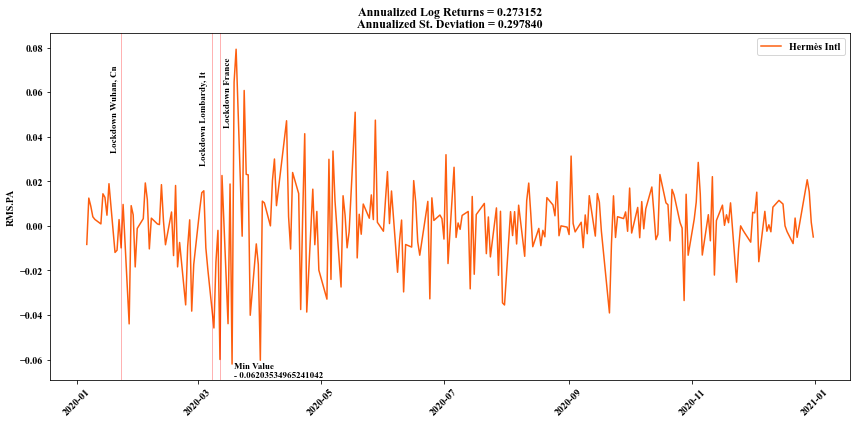

In [14]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = '10'

fig = plt.figure(figsize=(12,6)) 
log_returnsRMSPA = log_returns['RMS.PA']

sns.lineplot(data=log_returnsRMSPA,color='#FD5E0F')

plt.axvline(datetime(2020, 1, 23), color='r', linewidth=1,alpha=0.3)
plt.text(datetime(2020, 1, 18), 0.034, 'Lockdown Wuhan, Cn', fontsize=9,rotation=90)

plt.axvline(datetime(2020, 3, 8), color='r', linewidth=1,alpha=0.3)
plt.text(datetime(2020, 3, 2), 0.028, 'Lockdown Lombardy, It', fontsize=9,rotation=90)

plt.axvline(datetime(2020, 3, 12), color='r', linewidth=1,alpha=0.3)
plt.text(datetime(2020, 3, 14), 0.045, 'Lockdown France', fontsize=9,rotation=90)

RMSPAmin = log_returns['RMS.PA'].min()
plt.text(datetime(2020, 3, 19), -0.068, 'Min Value\n- 0.06203534965241042', fontsize=9)

plt.xticks(rotation=45)
plt.title("Annualized Log Returns = 0.273152\nAnnualized St. Deviation = 0.297840",fontsize=12)
plt.xlabel('')
plt.legend(loc='upper right', labels=['Hermès Intl'])
plt.tight_layout()
plt.show()

***
## - Probability Distribution for 2020 -

***

### - LVMH Moet Hennessy Louis Vuitton SE -

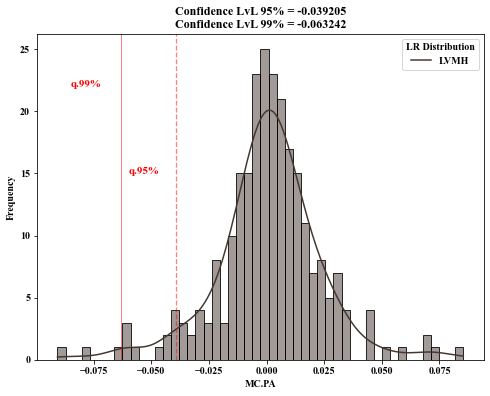

In [15]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = '10'

fig = plt.figure(figsize=(8,6)) 
sns.histplot(log_returns['MC.PA'], bins=50,kde=True,color='#453630') #Plot histogram for the frequency distribution 
plt.title("Confidence LvL 95% = -0.039205\nConfidence LvL 99% = -0.063242")

plt.axvline(-0.039205, color='r', linestyle='--',linewidth = 1.3,alpha=0.5) #Quantile 95%
plt.text(-0.060, 15,"q.95%", color='r',fontsize=11)

plt.axvline(-0.063242, color='r', linewidth=1,alpha=0.5) #Quantile 99%
plt.text(-0.085, 22,"q.99%", color='r',fontsize=11)

plt.ylabel('Frequency')
plt.legend(title='LR Distribution', loc='upper right', labels=['LVMH'])
plt.show()

In [16]:
#Quantile with 95% confidence
print(log_returns[['MC.PA','KER.PA','RMS.PA']].quantile(0.05))

MC.PA    -0.039285
KER.PA   -0.036641
RMS.PA   -0.034919
Name: 0.05, dtype: float64


In [17]:
#Quantile with 99% confidence
print(log_returns[['MC.PA','KER.PA','RMS.PA']].quantile(0.01))

MC.PA    -0.063257
KER.PA   -0.069715
RMS.PA   -0.052608
Name: 0.01, dtype: float64


### - Kering SA -

As a example we will use Kering Group, we know that the excepted returns was 2.164 % and a standard deviation at 0.408449. At the worst days of 2020, investors of **KER.PA (Kering Group)** lost -0.036641 (or - 3.6%) at 95% and -0.069715 (or - 6,97%) at 99% confidence level.

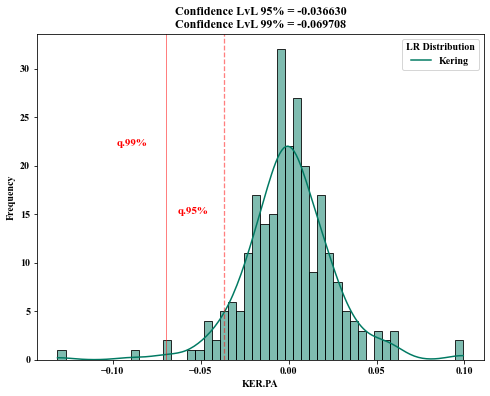

In [18]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = '10'

fig = plt.figure(figsize=(8,6)) 
sns.histplot(log_returns['KER.PA'],bins=50, kde=True,color='#017A63') #Plot histogram for the frequency distribution 
plt.title("Confidence LvL 95% = -0.036630\nConfidence LvL 99% = -0.069708")

plt.axvline(-0.036630, color='r', linestyle='--',linewidth = 1.3,alpha=0.5) #Quantile 95%
plt.text(-0.063, 15,"q.95%", color='r',fontsize=11)

plt.axvline(-0.069708, color='r', linewidth=1,alpha=0.5) #Quantile 99%
plt.text(-0.098, 22,"q.99%", color='r',fontsize=11)

plt.legend(title='LR Distribution', loc='upper right', labels=['Kering'])
plt.ylabel('Frequency')
plt.show()

### - Hermès International SE -

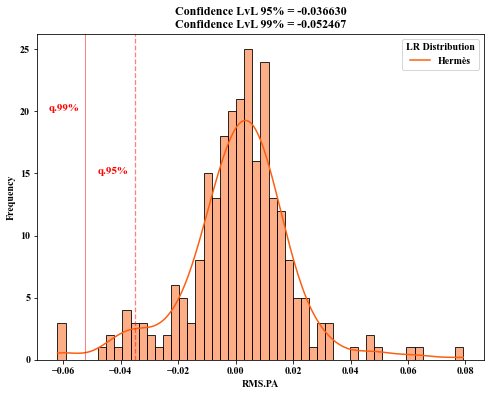

In [19]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = '10'

fig = plt.figure(figsize=(8,6)) 
sns.histplot(log_returns['RMS.PA'], bins=50,kde=True,color='#FD5E0F') #Plot histogram for the frequency distribution 
plt.title("Confidence LvL 95% = -0.036630\nConfidence LvL 99% = -0.052467")

plt.axvline(-0.034874, color='r', linestyle='--',linewidth = 1.3,alpha=0.5) #Quantile 95%
plt.text(-0.048, 15,"q.95%", color='r',fontsize=11)
plt.axvline(-0.052467, color='r', linewidth=1,alpha=0.5) #Quantile 99%
plt.text(-0.065, 20,"q.99%", color='r',fontsize=11) 
plt.legend(title='LR Distribution', loc='upper right', labels=['Hermès'])
plt.ylabel('Frequency')
plt.show()

## - Left, zero or right-skewed distributions?-

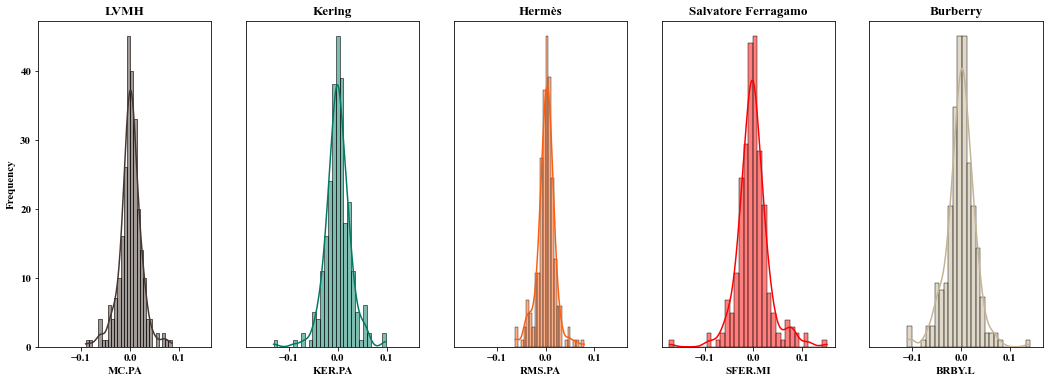

In [31]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = '11'

fig, axes = plt.subplots(1, 5, sharex=True, figsize=(18,6))
    
sns.histplot(ax=axes[0], x=log_returns['MC.PA'],kde=True,color='#453630') #Compare skewness of distribution on 5 subplots
axes[0].set_title("LVMH")
axes[0].set_ylabel("Frequency")

sns.histplot(ax=axes[1], x=log_returns['KER.PA'],kde=True,color='#017A63')
axes[1].set_title("Kering")
axes[1].set_ylabel("")
axes[1].set_yticks([])

sns.histplot(ax=axes[2], x=log_returns['RMS.PA'],kde=True,color='#FD5E0F')
axes[2].set_title("Hermès")
axes[2].set_ylabel("")
axes[2].set_yticks([])

sns.histplot(ax=axes[3], x=log_returns['SFER.MI'],color='#ff0000', kde=True)
axes[3].set_title("Salvatore Ferragamo")
axes[3].set_ylabel("")
axes[3].set_yticks([])

sns.histplot(ax=axes[4], x=log_returns['BRBY.L'],color='#c3b494',kde=True)
axes[4].set_title("Burberry")
axes[4].set_ylabel("")
axes[4].set_yticks([])
plt.show()

The spreading of Covid-19 across Europe pushed most of return distribution to the negative skew (left-tail). **RMS.PA (Hermès)** seems that have a better distribution on the mean, therefore more stability on the returns. **SFER.MI (Ferragamo)** have one of the longest left-skew with an important dispersion. Compare to the other companies, Salvatore Ferragamo just recovered his initial stock price in 2021.

## - Covariance & Correlation Matrix -
### - Sample variance? -

We could calculate the sample variance as an alternative of standard deviation. However, since it's basically the square root of the standard deviation that we previously calculated. And in addition, the function of Python .cov() gives us at the same time, the sample variance and the covariance all in one matrix. We will just used variance to verify our covariance matrix.

$$ s^2 = {\frac{\sum_{i=1}^n (x_i - \bar{x})^2}{n-1}} $$

In [21]:
log_returns[['MC.PA','KER.PA','RMS.PA']].var() #Sample Variance
log_returns[['MC.PA','KER.PA','RMS.PA']].var() * 250 #Annualized Variance

MC.PA     0.132144
KER.PA    0.166831
RMS.PA    0.089031
dtype: float64

### - Covariance matrix -

The covariance is a statistical measure of the difference between two values, here the returns for each stocks. Lucky for us, NumPy is handling perfectly the following equation for the log returns of our securities in one beautiful matrix. 

 $$ Cov_{(x,y)} = {\frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{n-1}} $$

In [22]:
cov_matrix = log_returns.cov() #Covariance Matrix
log_returns.cov()*250 #Annualized Covariance Matrix 

,MC.PA,RMS.PA,EL,KER.PA,CFR.SW,FB,MONC.MI,BRBY.L,TPR,RL,SFER.MI
MC.PA,0.132144,0.083241,0.084476,0.125942,0.104378,0.067840,0.120283,0.132027,0.157812,0.111370,0.120869
RMS.PA,0.083241,0.089031,0.049730,0.093029,0.068315,0.049494,0.084531,0.091870,0.101724,0.056008,0.092541
EL,0.084476,0.049730,0.168407,0.086010,0.083354,0.112121,0.098045,0.109061,0.235918,0.152814,0.067936
KER.PA,0.125942,0.093029,0.086010,0.166831,0.116389,0.066201,0.130978,0.144505,0.177137,0.116196,0.142040
CFR.SW,0.104378,0.068315,0.083354,0.116389,0.150366,0.059828,0.117358,0.123111,0.183639,0.137165,0.120699
FB,0.067840,0.049494,0.112121,0.066201,0.059828,0.209554,0.080975,0.081667,0.158110,0.091196,0.047081
MONC.MI,0.120283,0.084531,0.098045,0.130978,0.117358,0.080975,0.191377,0.139457,0.181921,0.129037,0.140768
BRBY.L,0.132027,0.091870,0.109061,0.144505,0.123111,0.081667,0.139457,0.216745,0.218284,0.146121,0.143135
TPR,0.157812,0.101724,0.235918,0.177137,0.183639,0.158110,0.181921,0.218284,0.677928,0.372217,0.116171
RL,0.111370,0.056008,0.152814,0.116196,0.137165,0.091196,0.129037,0.146121,0.372217,0.388935,0.119709


### - Correlation Matrix -

The correlation between the returns is critical to understand the **relationship** of each securities.  The idea is pretty straight forward. In the luxury industry, regardless of the stock price, each luxury group should have a high coefficient since they are part of the same industry. But at which coefficient? For example, if **MC.PA (LVMH)** and **KER.PA (Kering)** have a 0.85 in correlation, their securities will go up or/and down in the same direction. The correlation matrix give us correlation coefficients for each luxury group from -1 to +1. A correlation of +1.00 indicates a perfect positive correlation.

$$ Corr_{(x,y)} = {\frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}
{\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2 \sum_{i=1}^n (y_i - \bar{y})^2}}} $$
 

In [23]:
corr_matrix = log_returns.corr() #Create correlation between securities

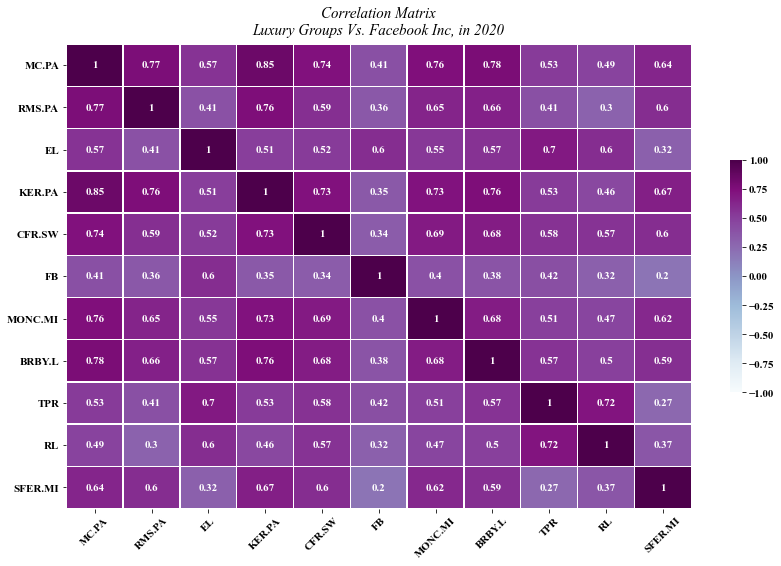

In [24]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = '11'

f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='BuPu',
            vmax=1,vmin=-1, center=0, linewidths=.4, cbar_kws={"shrink": .5}, ax=ax) #Correlation matrix with Seaborn heatmap

plt.subplots_adjust(bottom=0.28)
plt.title("Correlation Matrix\nLuxury Groups Vs. Facebook Inc, in 2020", pad=10, fontsize=15,
          family='Times New Roman', style='italic')

plt.yticks(rotation=0) 
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()


<b><i><H3>Observations</H3></i></b> 
- In 2020, <b>LVMH</b> and <b>Kering</b> are the most correlated groups at 0.85<br>
- As the most influential luxury group, <b>LVMH is highly correlated</b> to other groups<br>
- <b>Salvatore Ferragamo</b> has the lowest correlation with Facebook at 0.2 due to their small presence on social media<br>
- As a Tech stock, <b>Facebook Inc</b> Inc is obviously the least correlated security<br>
- <b>The correlation coefficients between luxury groups and Facebook are all increasing</b> without exception in 2019<br>
- Moreover, starting 2016, the correlation coefficients between Facebook and luxury groups are <b>all increasing</b> on a YoY basis

<b><i><H3>Conclusion</H3></i></b> 

- In the upcoming years, Facebook will be so correlated to luxury groups that these stocks **will not be offering diversification** in a portfolio<br>
- If you chart **the weighted average of number of followers** on the mature social media platforms for each most profitable brands, you will have the same ranking as the MarketCap in order (with the exception of Hermès)<br>
- Hermès is perfectly **leveraging the power of social media**, without exposing itself too much<br>
- Even if Chinese consumers are the most important clients in the luxury industry, the  **Wuhan lockdown** did not result in much of an impact<br>
- The decline started when it reached Italy, and France. The **first lockdown** was a major issue for brands and retailers<br>
- We didn't see a **"second dip"** and in 2021 stock prices are at record high<br>
- Luxury brands are exposed to **risk of backlash on social media** that will decrease revenues for 2 or 3 quarters depending on the response (Gucci in 2019, Dolce & Gabbana in 2018)<br>
- Tech insiders have great advantage for **momentum trading**, not fashion insiders<br>
- The Chinese social media platforms are extremely **powerful**, yet they are not all created equal (opaque MAU, horrible API, and fake likes)<br>
- If more than 60% of marketing budget is going to digital, then **social media performance should be monitored** and linked from digital departments to financial departments<br>
- Digital marketers should be able to **understand APIs** in order to discover insights, create bestpratices, calculate ROI<br> 

Thank you for reading! Hope this crisis will end soon.<br>
Please feel free to contact me if you have any questions.<br><br>
**Akim Mousterou**

***
**Disclaimer:**
*None of the content published on this notebook constitutes a recommendation that any particular security, portfolio of securities, transaction, or investment strategy is suitable for any specific person. None of the information providers or their affiliates will advise you personally concerning the nature, potential, value, or suitability of any particular security, portfolio of securities, transaction, investment strategy, or other matter.*